In [1]:
import numpy as np
import pandas as pd

!pip install factor_analyzer

In [2]:
def second_moment(X, var_of_interest, control_vars):
    S = np.array(X)

    S_xx = S[control_vars][:, control_vars]
    S_yx = S[var_of_interest][:, control_vars]
    S_xy = S[control_vars][:, var_of_interest]
    S_yy = S[var_of_interest[0]][var_of_interest]
    
    S_i = np.zeros((1 + len(control_vars), 1 + len(control_vars)))
    S_i[:len(control_vars), :len(control_vars)] = S_xx
    S_i[len(control_vars):, len(control_vars):] = S_yy
    S_i[:len(control_vars), len(control_vars):] = S_xy
    S_i[len(control_vars):, :len(control_vars)] = S_yx

    det_S = np.linalg.det(S_i)
    det_S_xx = np.linalg.det(S_xx)

    return np.round((1 - det_S / (S_yy * det_S_xx))[0], 4)

In [3]:
A = np.array([[2/3, 1/3], [1/3, 1/3], [-1/3, 2/3]])

S_F = np.identity(2)
S_G = np.diag([4/9, 7/9, 4/9])

S = A@S_F@A.T + S_G

print(second_moment(S, [0], [1, 2]))
print(second_moment(S, [1], [0, 2]))
print(second_moment(S, [2], [0, 1]))

0.1125
0.1235
0.0139


In [4]:
np.linalg.inv(S) * 71

array([[ 80., -27.,   3.],
       [-27.,  81.,  -9.],
       [  3.,  -9.,  72.]])

In [5]:
heptathlon_path = "Data/heptathlon.txt"

heptathlon = pd.read_csv(heptathlon_path, sep=" ").drop(columns=["Name", "Points"])
heptathlon.head()

,Hurdles,High Jump,Shot,Run200,Longjump,Javelin,Run800
0,12.69,1.86,15.80,22.56,7.27,45.66,128.51
1,12.85,1.80,16.23,23.65,6.71,42.56,126.14
2,13.20,1.83,14.20,23.10,6.68,44.54,124.20
3,13.51,1.74,14.76,23.93,6.32,47.46,127.90
4,13.61,1.80,15.23,23.92,6.25,42.78,132.24


In [8]:
# Make a factor analysis with n=2 factors and rotate the factors by means of the Varimax criterion. 

from sklearn.decomposition import FactorAnalysis, PCA

fa = FactorAnalysis(n_components=2)
fa_varimax = FactorAnalysis(n_components=2, rotation="varimax")

pca = PCA()

X_transformed = fa.fit_transform(heptathlon)
X_transformed_varimax = fa_varimax.fit_transform(heptathlon)
X_transformed_pca = pca.fit_transform(heptathlon)

print("Non rotated")
print(fa.components_)
print("Rotated")
print(fa_varimax.components_)

# What is the fraction of the total variation described by each of the 2 unrotated and the 2 rotated 
# factors, and what is the fraction described by the 2 factors combined in both cases?  



Non rotated
[[ 0.69907694 -0.06158961 -1.0282212   0.77647537 -0.43980929 -0.20774734
   6.1533433 ]
 [ 0.07790111 -0.02059218  0.63470536 -0.31381779  0.04102635  1.95636992
   1.15235895]]
Rotated
[[ 0.70135736 -0.06434666 -0.8920693   0.70447001 -0.42448053  0.16013318
   6.26030222]
 [-0.05361911 -0.00876501  0.81504729 -0.45289911  0.12219516  1.96084155
  -0.01345467]]


Bartlett's Test: chi-square=136.80468013941513, p-value=5.443441011805975e-19
KMO Test: 0.6827547865308825
Factor Loadings:
                   0         1
Hurdles    0.997326 -0.077134
High Jump -0.792054 -0.014467
Shot      -0.573105  0.546373
Run200     0.705902 -0.511521
Longjump  -0.938786  0.266959
Javelin    0.046663  0.586138
Run800     0.755684 -0.036656

Variance Explained:
    Eigenvalue  Proportion Var  Cumulative Var
0    3.903311        0.557616        0.557616
1    0.982505        0.140358        0.697974

Factor Scores:
      Factor1   Factor2
0  -2.057375  1.436190
1  -1.389039  0.627472
2  -0.714207  1.142117
3  -0.591887  0.896421
4   0.446779  1.300926
5  -0.026502  0.268147
6  -0.485108  0.195347
7  -0.501215 -0.036753
8   0.085681  0.206281
9  -0.784518 -0.266015
10 -0.023752 -0.406451
11 -0.503499 -0.432509
12 -0.052325 -0.202419
13 -0.183498 -0.020141
14 -0.222101 -0.096062
15  0.237767  0.302467
16 -1.286311 -1.744524
17  0.276524  0.287119
18  0.516789  0.02820

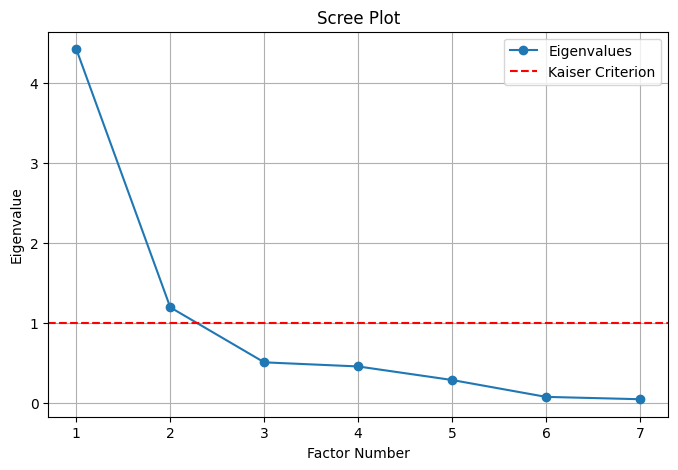

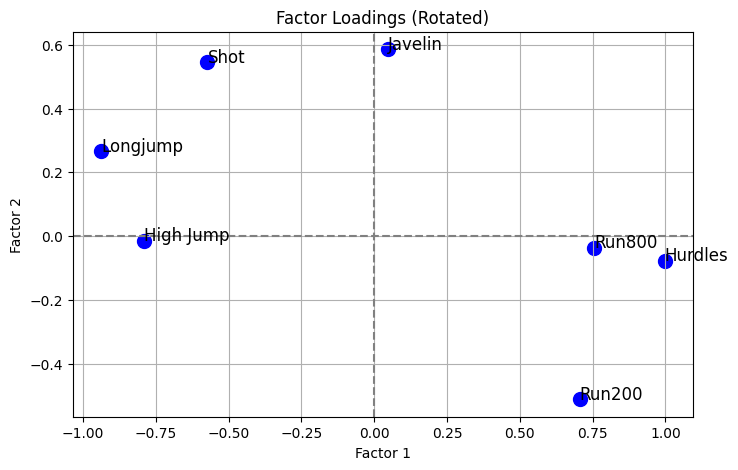

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo


df = heptathlon

# Step 1: Check suitability of factor analysis
# Bartlett's test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett's Test: chi-square={chi_square_value}, p-value={p_value}")

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Test: {kmo_model}")

# Step 2: Factor Analysis
# Perform factor analysis to extract 2 factors
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)

# Step 3: Extract results
# Factor loadings
loadings = fa.loadings_
print("Factor Loadings:\n", pd.DataFrame(loadings, index=df.columns))

# Variance explained
variance_explained = fa.get_factor_variance()
print("\nVariance Explained:\n", pd.DataFrame({
    "Eigenvalue": variance_explained[0],
    "Proportion Var": variance_explained[1],
    "Cumulative Var": variance_explained[2]
}))

# Factor scores (scored data)
scores = fa.transform(df)
scores_df = pd.DataFrame(scores, columns=["Factor1", "Factor2"])
print("\nFactor Scores:\n", scores_df)

# Step 4: Scree Plot
eigenvalues, _ = fa.get_eigenvalues()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', label="Eigenvalues")
plt.axhline(y=1, color='r', linestyle='--', label="Kaiser Criterion")
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.legend()
plt.grid()
plt.show()

# Step 5: Loading Plot
plt.figure(figsize=(8, 5))
plt.scatter(loadings[:, 0], loadings[:, 1], s=100, c='blue')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), fontsize=12)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Factor Loadings (Rotated)")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid()
plt.show()
